In [184]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"achmadfauzannabil","key":"6f9e7aee51e86f68151fb3d8ff867f43"}'}

In [185]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!ls ~/.kaggle

kaggle.json


In [186]:
!kaggle datasets download -d muratkokludataset/dry-bean-dataset

  0% 0.00/4.54M [00:00<?, ?B/s]
100% 4.54M/4.54M [00:00<00:00, 122MB/s]


In [187]:
!mkdir dry-bean-dataset
!unzip dry-bean-dataset.zip -d dry-bean-dataset
!ls dry-bean-dataset

Archive:  dry-bean-dataset.zip
  inflating: dry-bean-dataset/Dry_Bean_Dataset/Dry_Bean_Dataset.arff  
  inflating: dry-bean-dataset/Dry_Bean_Dataset/Dry_Bean_Dataset.xlsx  
  inflating: dry-bean-dataset/Dry_Bean_Dataset/Dry_Bean_Dataset_Citation_Request.txt  
Dry_Bean_Dataset


In [188]:
import numpy as np
import pandas as pd

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder

In [189]:
df = pd.read_excel('/content/dry-bean-dataset/Dry_Bean_Dataset/Dry_Bean_Dataset.xlsx')

In [190]:
df.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER


In [191]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13611 entries, 0 to 13610
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             13611 non-null  int64  
 1   Perimeter        13611 non-null  float64
 2   MajorAxisLength  13611 non-null  float64
 3   MinorAxisLength  13611 non-null  float64
 4   AspectRation     13611 non-null  float64
 5   Eccentricity     13611 non-null  float64
 6   ConvexArea       13611 non-null  int64  
 7   EquivDiameter    13611 non-null  float64
 8   Extent           13611 non-null  float64
 9   Solidity         13611 non-null  float64
 10  roundness        13611 non-null  float64
 11  Compactness      13611 non-null  float64
 12  ShapeFactor1     13611 non-null  float64
 13  ShapeFactor2     13611 non-null  float64
 14  ShapeFactor3     13611 non-null  float64
 15  ShapeFactor4     13611 non-null  float64
 16  Class            13611 non-null  object 
dtypes: float64(1

In [192]:
df.shape

(13611, 17)

In [193]:
df.duplicated().sum()

68

In [194]:
df = df.drop_duplicates()

In [195]:
df.duplicated().sum()

0

In [196]:
df.isnull().sum()

Area               0
Perimeter          0
MajorAxisLength    0
MinorAxisLength    0
AspectRation       0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Solidity           0
roundness          0
Compactness        0
ShapeFactor1       0
ShapeFactor2       0
ShapeFactor3       0
ShapeFactor4       0
Class              0
dtype: int64

<ipython-input-197-97cdbf7f1862>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

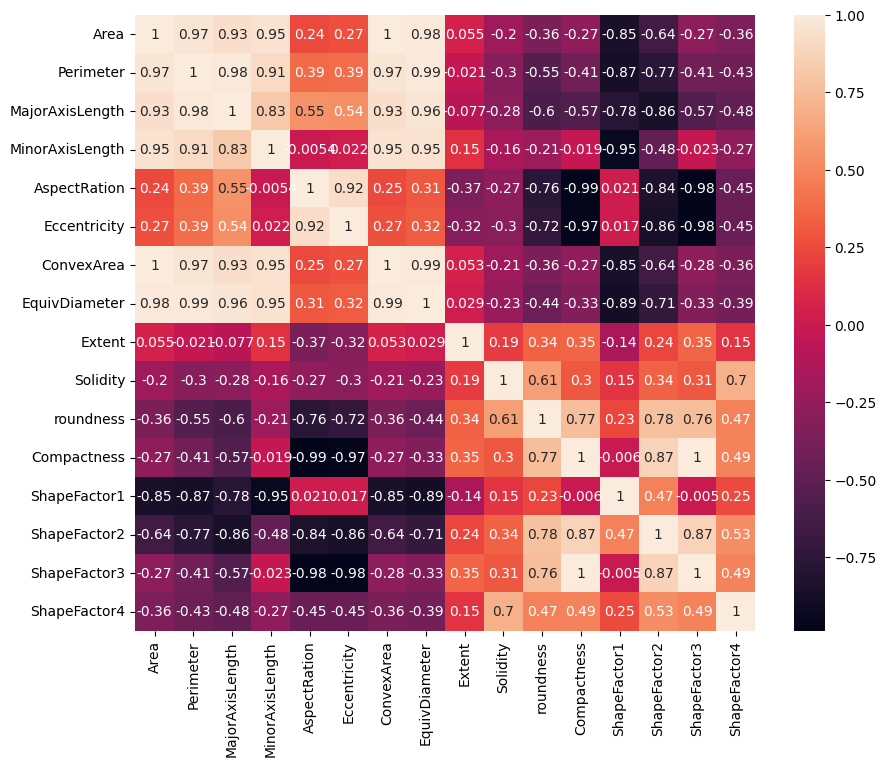

In [197]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True)

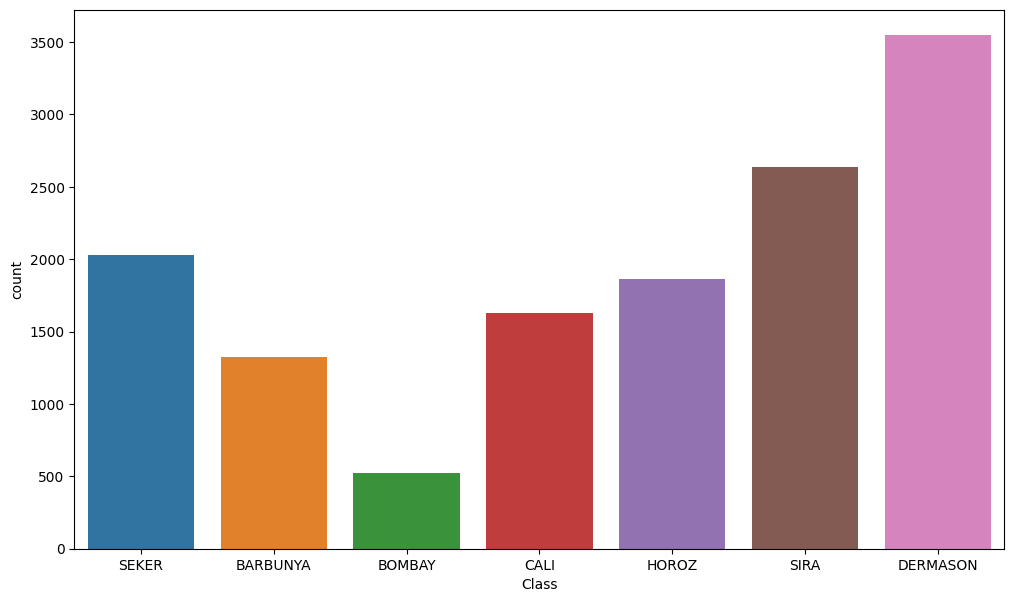

In [198]:
plt.figure(figsize=(12,7))
sns.countplot(x='Class', data=df)
plt.show()

In [199]:
df['Class'].value_counts()

DERMASON    3546
SIRA        2636
SEKER       2027
HOROZ       1860
CALI        1630
BARBUNYA    1322
BOMBAY       522
Name: Class, dtype: int64

In [200]:
label_encoder = LabelEncoder()

df['Class'] = label_encoder.fit_transform(df['Class'])
df.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,5
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,5
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,5
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,5
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,5


In [201]:
df['Class'].value_counts()

3    3546
6    2636
5    2027
4    1860
2    1630
0    1322
1     522
Name: Class, dtype: int64

In [202]:
df.columns

Index(['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength',
       'AspectRation', 'Eccentricity', 'ConvexArea', 'EquivDiameter', 'Extent',
       'Solidity', 'roundness', 'Compactness', 'ShapeFactor1', 'ShapeFactor2',
       'ShapeFactor3', 'ShapeFactor4', 'Class'],
      dtype='object')

In [203]:
df = df.drop(['ShapeFactor1', 'ShapeFactor2', 'ShapeFactor3', 'ShapeFactor4'], axis=1)

In [204]:
df.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,5
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,5
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,5
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,5
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,5


In [205]:
X = df.drop(columns='Class', axis=1)
Y = df['Class']

In [206]:
print(X)

        Area  Perimeter  MajorAxisLength  MinorAxisLength  AspectRation  \
0      28395    610.291       208.178117       173.888747      1.197191   
1      28734    638.018       200.524796       182.734419      1.097356   
2      29380    624.110       212.826130       175.931143      1.209713   
3      30008    645.884       210.557999       182.516516      1.153638   
4      30140    620.134       201.847882       190.279279      1.060798   
...      ...        ...              ...              ...           ...   
13606  42097    759.696       288.721612       185.944705      1.552728   
13607  42101    757.499       281.576392       190.713136      1.476439   
13608  42139    759.321       281.539928       191.187979      1.472582   
13609  42147    763.779       283.382636       190.275731      1.489326   
13610  42159    772.237       295.142741       182.204716      1.619841   

       Eccentricity  ConvexArea  EquivDiameter    Extent  Solidity  roundness  \
0          0.54981

In [207]:
print(Y)

0        5
1        5
2        5
3        5
4        5
        ..
13606    3
13607    3
13608    3
13609    3
13610    3
Name: Class, Length: 13543, dtype: int64


In [208]:
scaler = StandardScaler()

In [209]:
scaler.fit(X)

StandardScaler()

In [210]:
standarized_data = scaler.transform(X)

In [211]:
print(standarized_data)

[[-0.83879977 -1.13966273 -1.30197615 ...  0.36647626  1.42034598
   1.83862817]
 [-0.82726577 -1.01052862 -1.39116937 ... -0.46588597  0.22498659
   2.49762247]
 [-0.80528652 -1.07530293 -1.24780735 ...  0.5176142   1.24897881
   1.76405333]
 ...
 [-0.37117925 -0.44557909 -0.44700409 ...  0.59072955  0.75352624
   0.36408947]
 [-0.37090706 -0.42481666 -0.42552883 ...  0.14208331  0.57643461
   0.27830875]
 [-0.37049878 -0.38542487 -0.2884744  ...  0.53677879  0.24766231
  -0.24982692]]


In [212]:
X = standarized_data
Y = df['Class']

In [213]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size= 0.2, stratify=Y, random_state=2)

In [214]:
print(X.shape, X_train.shape, X_test.shape)

(13543, 12) (10834, 12) (2709, 12)


In [215]:
classifier = svm.SVC(kernel='linear')

In [216]:
classifier.fit(X_train, Y_train)

SVC(kernel='linear')

In [217]:
X_train_prediction = classifier.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [218]:
print('Akurasi data training adalah = ', training_data_accuracy)

Akurasi data training adalah =  0.916928189034521


In [219]:
X_test_prediction = classifier.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [220]:
print('Akurasi data testing adalah = ', test_data_accuracy)

Akurasi data testing adalah =  0.9254337393872277


In [221]:
df.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,5
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,5
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,5
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,5
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,5


* (0) BARBUNYA
* (1) BOMBAY
* (2) CALI
* (3) DERMASON
* (4) HOROZ
* (5) SEKER
* (6) SIRA

In [222]:
input_data = (28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,	0.958027,	0.913358)
input_data_as_numpy_array = np.array(input_data)

input_data_reshape = input_data_as_numpy_array.reshape(1,-1)

std_data = scaler.transform(input_data_reshape)
print(std_data)

prediction = classifier.predict(std_data)
print()
print(prediction)
print()
decoded_prediction = label_encoder.inverse_transform(prediction)

if decoded_prediction == 'BARBUNYA':
    print('Tumbuhan Termasuk Kedalam Kelompok Barbuya')
elif decoded_prediction == 'BOMBAY':
    print('Tumbuhan Termasuk Kedalam Kelompok Bombay')
elif decoded_prediction == 'CALI':
    print('Tumbuhan Termasuk Kedalam Kelompok Cali')
elif decoded_prediction == 'DERMASON':
    print('Tumbuhan Termasuk Kedalam Kelompok Dermason')
elif decoded_prediction == 'HOROZ':
    print('Tumbuhan Termasuk Kedalam Kelompok Horoz')
elif decoded_prediction == 'SEKER':
    print('Tumbuhan Termasuk Kedalam Kelompok Seker')
else:
    print('Tumbuhan Termasuk Kedalam Kelompok Sira')
print()

[[-0.83879977 -1.13966273 -1.30197615 -0.63211085 -1.56536439 -2.1828351
  -0.83948878 -1.06049147  0.28799102  0.36647656  1.42034385  1.83863216]]

[5]

Tumbuhan Termasuk Kedalam Kelompok Seker



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [223]:
import pickle

pickle.dump(classifier, open('Dry_Bean_Dataset.sav','wb'))
pickle.dump(scaler, open('scaler.sav','wb'))